In [11]:
import pandas as pd
import numpy as np
import scipy.optimize as optimize
import seaborn as sn
import matplotlib.pyplot as plt
import qeds
%matplotlib inline
import os
import math
import qeds
qeds.themes.mpl_style();

from IPython.display import display
import statistics

In [3]:
fwd = pd.read_csv('Forward_data.csv')
fwd

,1,2,3,4
0,0.01107,0.01634,0.02930,0.01876
1,0.01060,0.01598,0.02895,0.01851
2,0.01133,0.01645,0.02926,0.01880
3,0.01156,0.01652,0.02917,0.01869
4,0.01179,0.01694,0.02948,0.01900
5,0.01279,0.01781,0.01967,0.01984
6,0.01304,0.01819,0.03093,0.02034
7,0.01286,0.01817,0.03100,0.02043
8,0.01350,0.01848,0.03112,0.02053
9,0.01332,0.01798,0.03069,0.02001


In [4]:
def lst(df, grp):
    y = df[grp].values.tolist()
    return y


_1yr_1yr = lst(fwd, "1")
_1yr_2yr = lst(fwd, "2")
_1yr_3yr = lst(fwd, "3")
_1yr_4yr = lst(fwd, "4")


fwdr = [_1yr_1yr,_1yr_2yr,_1yr_3yr,_1yr_4yr]

In [6]:
log_f = []
for f_yr in fwdr:
    x_lst = []
    for i in range(9):
        x = math.log(f_yr[i+1]/f_yr[i])
        x_lst.append(x)
    log_f.append(x_lst)

In [7]:
log_f_dict = {"log 1yr-1yr": log_f[0], "log 1yr-2yr": log_f[1], "log 1yr-3yr": log_f[2], "log 1yr-4yr": log_f[3]}

log_f_df = pd.DataFrame(log_f_dict)

In [8]:
log_f_df.cov()

,log 1yr-1yr,log 1yr-2yr,log 1yr-3yr,log 1yr-4yr
log 1yr-1yr,0.001630,0.000900,-0.002926,0.000628
log 1yr-2yr,0.000900,0.000620,-0.001241,0.000491
log 1yr-3yr,-0.002926,-0.001241,0.046118,-0.000708
log 1yr-4yr,0.000628,0.000491,-0.000708,0.000432


In [9]:
data = np.array(log_f)
covMatrix = np.cov(data,bias=True)
covM = np.around(covMatrix, decimals=4)
covM

array([[ 0.0014,  0.0008, -0.0026,  0.0006],
       [ 0.0008,  0.0006, -0.0011,  0.0004],
       [-0.0026, -0.0011,  0.041 , -0.0006],
       [ 0.0006,  0.0004, -0.0006,  0.0004]])

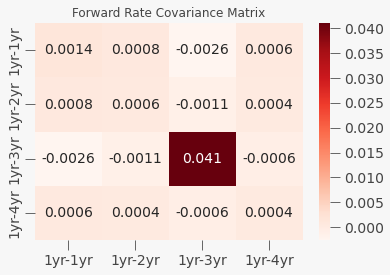

In [12]:
ax = plt.subplot()
sn.heatmap(covM, annot=True, cmap="Reds", fmt='g')
sn.set(font_scale=1)
ax.set_title('Forward Rate Covariance Matrix');
ax.xaxis.set_ticklabels(["1yr-1yr", "1yr-2yr", "1yr-3yr", "1yr-4yr"]);
ax.yaxis.set_ticklabels(["1yr-1yr", "1yr-2yr", "1yr-3yr", "1yr-4yr"]);
plt.show()

In [17]:
np.linalg.eig(covM)

(array([4.12128815e-02, 1.98424428e-03, 1.18652943e-04, 8.42212583e-05]),
 array([[ 6.59403413e-02,  7.69146666e-01, -6.12514848e-01,
          1.69973052e-01],
        [ 2.84672183e-02,  5.00686050e-01,  4.22237426e-01,
         -7.55128236e-01],
        [-9.97290513e-01,  7.13800013e-02, -1.77899508e-02,
         -2.15458592e-04],
        [ 1.59098151e-02,  3.90681176e-01,  6.68000475e-01,
          6.33159113e-01]]))

In [28]:
solution = np.linalg.eig(covM)
eigenValues = solution[0]
eigenVectors = solution[1]
np. set_printoptions(suppress=True)

In [29]:
values = np.around(eigenValues, decimals=5)
values

array([0.04121, 0.00198, 0.00012, 0.00008])

In [30]:
vectors = np.around(eigenVectors, decimals=5)
vectors

array([[ 0.06594,  0.76915, -0.61251,  0.16997],
       [ 0.02847,  0.50069,  0.42224, -0.75513],
       [-0.99729,  0.07138, -0.01779, -0.00022],
       [ 0.01591,  0.39068,  0.668  ,  0.63316]])